<a href="https://colab.research.google.com/github/Cloudydesuu/AITrainnning/blob/main/Sentimentanalysis_TraditionalML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'imdb-dataset-of-50k-movie-reviews' dataset.
Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews


In [3]:
DATA_PATH = '/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv'
GLOVE_PATH = 'glove.6B.100d.txt'
EMBEDDING_DIM = 100
MAX_SEQUENCE_LENGTH = 250
VOCAB_SIZE = 10000
LSTM_UNITS = 128
DROPOUT_RATE = 0.5
EPOCHS = 5
BATCH_SIZE = 64

In [4]:
print("--- 1. Loading Data ---")
df = None
try:
    df = pd.read_csv(DATA_PATH)
    print("Data loaded successfully.")
    print(df.head())
    print(f"\nTotal number of reviews: {len(df)}")
    print("Sentiment distribution:")
    print(df['sentiment'].value_counts())
except FileNotFoundError:
    print(f"Error: {DATA_PATH} not found. Creating a small dummy dataset for demonstration.")
    data = {
        'review': [
            "This movie was absolutely fantastic! Loved every minute of it.",
            "A total waste of time, I hated it. Very boring.",
            "It was okay, not great, not terrible.",
            "Best movie ever! Highly recommend.",
            "Worst acting and plot. Don't watch this."
        ],
        'sentiment': [
            "positive",
            "negative",
            "negative",
            "positive",
            "negative"
        ]
    }
    df = pd.DataFrame(data)
    print("Dummy data created.")
    print(df.head())
    print(f"\nTotal number of dummy reviews: {len(df)}")
    print("Dummy sentiment distribution:")
    print(df['sentiment'].value_counts())
except Exception as e:
    print(f"An unexpected error occurred during data loading: {e}")
    exit()

if df is None:
    print("Failed to load or create data. Exiting.")
    exit()

--- 1. Loading Data ---
Data loaded successfully.
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Total number of reviews: 50000
Sentiment distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [5]:
print("\n--- 2. Data Preprocessing ---")
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

df['review'] = df['review'].apply(clean_text)

print("\n--- 3. Splitting Data ---")
if len(df) < 100:
    test_split_size = 0.4
else:
    test_split_size = 0.2

X_train_text, X_test_text, y_train, y_test = train_test_split(df['review'].values, df['sentiment'].values, test_size=test_split_size, random_state=42, stratify=df['sentiment'].values)
print(f"X_train_text shape: {X_train_text.shape}")
print(f"X_test_text shape: {X_test_text.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


--- 2. Data Preprocessing ---

--- 3. Splitting Data ---
X_train_text shape: (40000,)
X_test_text shape: (10000,)
y_train shape: (40000,)
y_test shape: (10000,)


In [6]:
print("\n--- 4. TF-IDF Vectorization ---")
if len(df) < 100:
    max_features = None
else:
    max_features = 10000

vectorizer = TfidfVectorizer(max_features=max_features)
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

print(f"TF-IDF train shape: {X_train_tfidf.shape}")
print(f"TF-IDF test shape: {X_test_tfidf.shape}")


--- 4. TF-IDF Vectorization ---
TF-IDF train shape: (40000, 10000)
TF-IDF test shape: (10000, 10000)



--- 5. Training and Evaluating Logistic Regression ---
--- Logistic Regression ---
Test Accuracy: 0.8946

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      5000
           1       0.89      0.90      0.90      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


Confusion Matrix:
[[4432  568]
 [ 486 4514]]


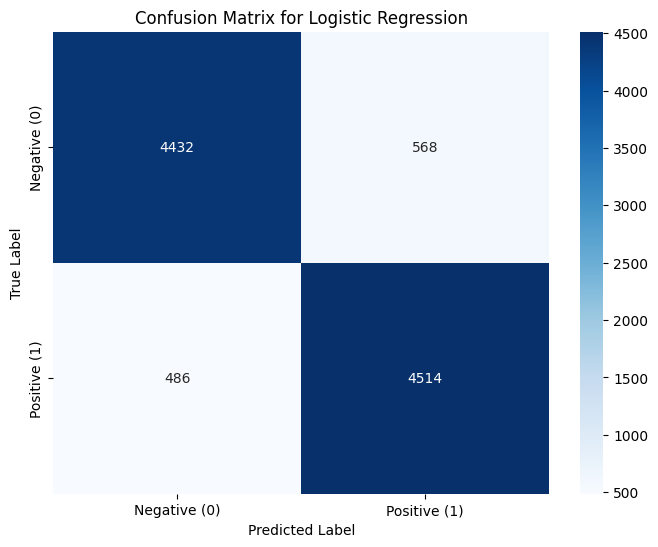

In [7]:
print("\n--- 5. Training and Evaluating Logistic Regression ---")
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)
lr_acc = accuracy_score(y_test, y_pred_lr)
print("--- Logistic Regression ---")
print(f"Test Accuracy: {lr_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:")
lr_cm = confusion_matrix(y_test, y_pred_lr)
print(lr_cm)

plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative (0)', 'Positive (1)'],
            yticklabels=['Negative (0)', 'Positive (1)'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



--- 7. Training and Evaluating Naive Bayes ---
--- Naive Bayes (MultinomialNB) ---
Test Accuracy: 0.8563

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      5000
           1       0.86      0.85      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


Confusion Matrix:
[[4292  708]
 [ 729 4271]]


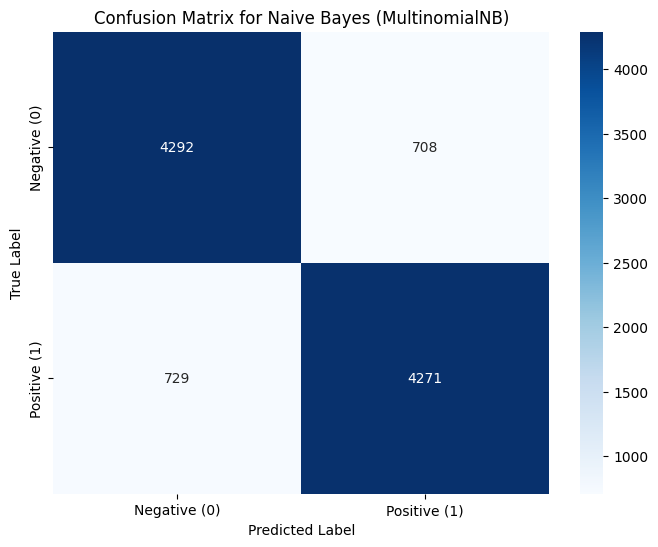

In [8]:
print("\n--- 7. Training and Evaluating Naive Bayes ---")
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)
nb_acc = accuracy_score(y_test, y_pred_nb)
print("--- Naive Bayes (MultinomialNB) ---")
print(f"Test Accuracy: {nb_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))
print("\nConfusion Matrix:")
nb_cm = confusion_matrix(y_test, y_pred_nb)
print(nb_cm)

plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative (0)', 'Positive (1)'],
            yticklabels=['Negative (0)', 'Positive (1)'])
plt.title('Confusion Matrix for Naive Bayes (MultinomialNB)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


--- 6. Training and Evaluating Support Vector Machine (SVC) ---
--- Support Vector Machine (SVC) ---
Test Accuracy: 0.8943

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      5000
           1       0.89      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


Confusion Matrix:
[[4441  559]
 [ 498 4502]]


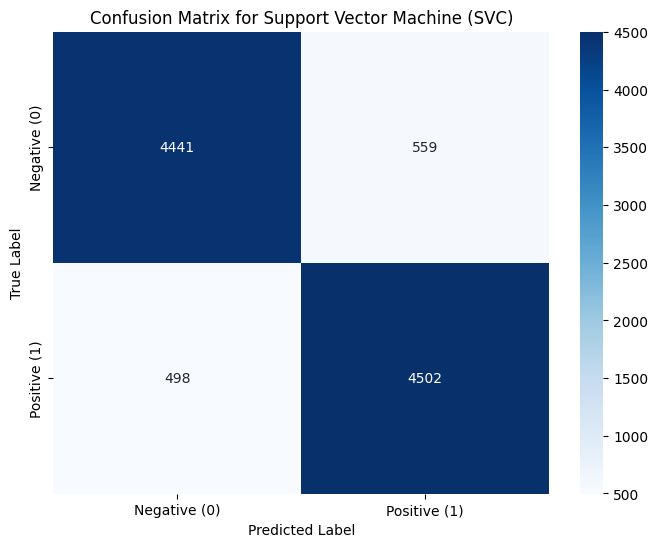

In [9]:
print("\n--- 6. Training and Evaluating Support Vector Machine (SVC) ---")
svc_model = SVC(kernel='linear')
svc_model.fit(X_train_tfidf, y_train)
y_pred_svc = svc_model.predict(X_test_tfidf)
svc_acc = accuracy_score(y_test, y_pred_svc)
print("--- Support Vector Machine (SVC) ---")
print(f"Test Accuracy: {svc_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc))
print("\nConfusion Matrix:")
svc_cm = confusion_matrix(y_test, y_pred_svc)
print(svc_cm)

plt.figure(figsize=(8, 6))
sns.heatmap(svc_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative (0)', 'Positive (1)'],
            yticklabels=['Negative (0)', 'Positive (1)'])
plt.title('Confusion Matrix for Support Vector Machine (SVC)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()